In [4]:
from load_modules import * 
from scipy.fft import dct

In [2]:
file_location = "../../data/Raman/raw/"
 
filenames = glob.glob(file_location+'/[!Wave|metadata]*.txt')

data = load_files([filenames], True)


start loading data, number of files 20
opening file 1 of 20: ../../data/Raman/raw/Alina_Art_4_2.txt
loaded  file 1 of 20: ../../data/Raman/raw/Alina_Art_4_2.txt
opening file 2 of 20: ../../data/Raman/raw/Alina_Art_BluePaint_3.txt
loaded  file 2 of 20: ../../data/Raman/raw/Alina_Art_BluePaint_3.txt
opening file 3 of 20: ../../data/Raman/raw/Alina_Art_BluePaint_4.txt
loaded  file 3 of 20: ../../data/Raman/raw/Alina_Art_BluePaint_4.txt
opening file 4 of 20: ../../data/Raman/raw/Alina_Art_WhitePaint.txt
loaded  file 4 of 20: ../../data/Raman/raw/Alina_Art_WhitePaint.txt
opening file 5 of 20: ../../data/Raman/raw/Alina_art_2_1.txt
loaded  file 5 of 20: ../../data/Raman/raw/Alina_art_2_1.txt
opening file 6 of 20: ../../data/Raman/raw/Alina_Art_GreenPaint.txt
loaded  file 6 of 20: ../../data/Raman/raw/Alina_Art_GreenPaint.txt
opening file 7 of 20: ../../data/Raman/raw/Alina_art_1_1.txt
loaded  file 7 of 20: ../../data/Raman/raw/Alina_art_1_1.txt
opening file 8 of 20: ../../data/Raman/raw/Alin

In [3]:
n = 0
img, wavenumbers = data[0][n], data[1][n]
img = img.reshape((-1, img.shape[-1]))
img.shape

(6300, 2126)

In [7]:
split = splitting.split(
            wavenumbers = wavenumbers,
            size = img.shape[-1],
            FWHM = 600,
            order = 1,
            convergence = 1e-3,
            segment_width = 400,
        )
photo = split(img.reshape(-1, img.shape[-1]), img.reshape(-1, img.shape[-1]))


inner iterations 21
iteration: 0 gives an outer error 52.16787365974021 with a learning rate of 1
inner iterations 5
iteration: 1 gives an outer error 1.4873848109851735 with a learning rate of 1
inner iterations 5
iteration: 2 gives an outer error 0.04192647470351763 with a learning rate of 1
inner iterations 5
iteration: 3 gives an outer error 0.013085064101099426 with a learning rate of 1
inner iterations 5
iteration: 4 gives an outer error 0.005688229482663196 with a learning rate of 1
inner iterations 5
iteration: 5 gives an outer error 0.0025538169001938682 with a learning rate of 1
inner iterations 5
iteration: 6 gives an outer error 0.001279253520537584 with a learning rate of 1
inner iterations 5
iteration: 7 gives an outer error 0.0007403904414017038 with a learning rate of 1
outer iterations 7


2567


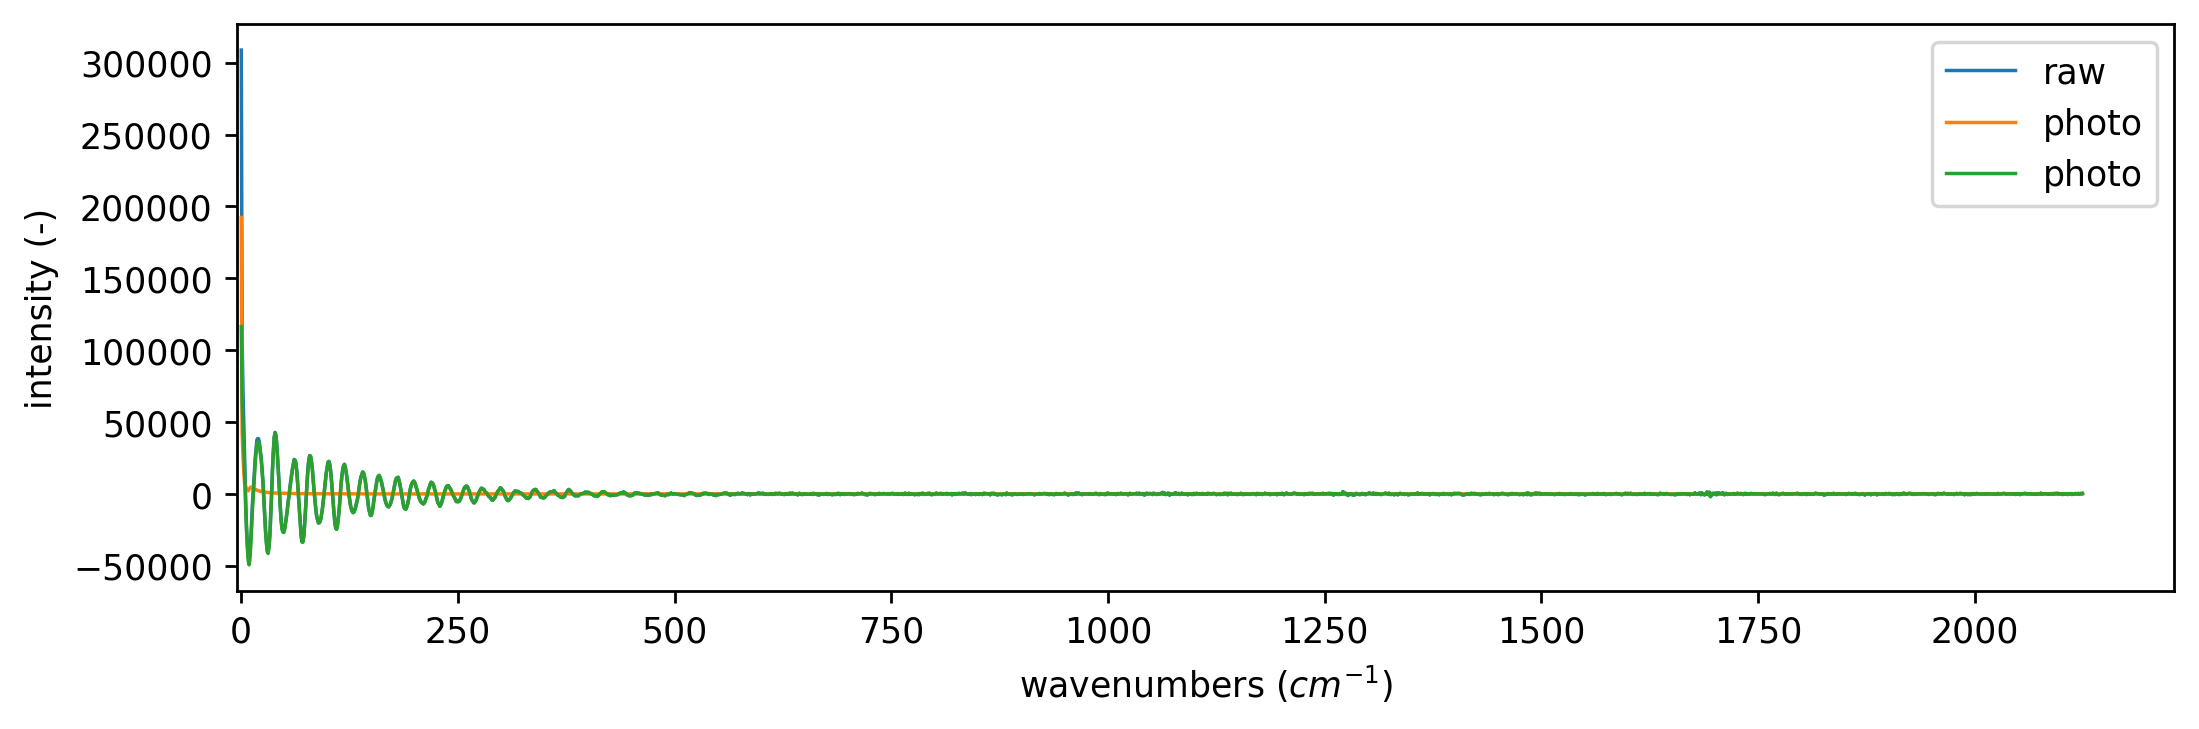

In [15]:
raman = img.reshape(-1, img.shape[-1]) - photo
i = np.random.randint(6300)
i = 2567
print(i)

plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['lines.linewidth'] = 1

L,R = 0, 2125
plt.plot(dct(img[i][L:R], type=2, norm='backward') , label="raw")
plt.plot(dct(photo[i][L:R], type=2, norm='backward'), label="photo")
plt.plot(dct(img[i][L:R]-photo[i][L:R], type=2, norm='backward'), label="photo")
plt.xlim(-5)
plt.legend()
plt.xlabel(r"wavenumbers ($cm^{-1}$)")
plt.ylabel("intensity (-)")
plt.show()


(0.0, 1.0)

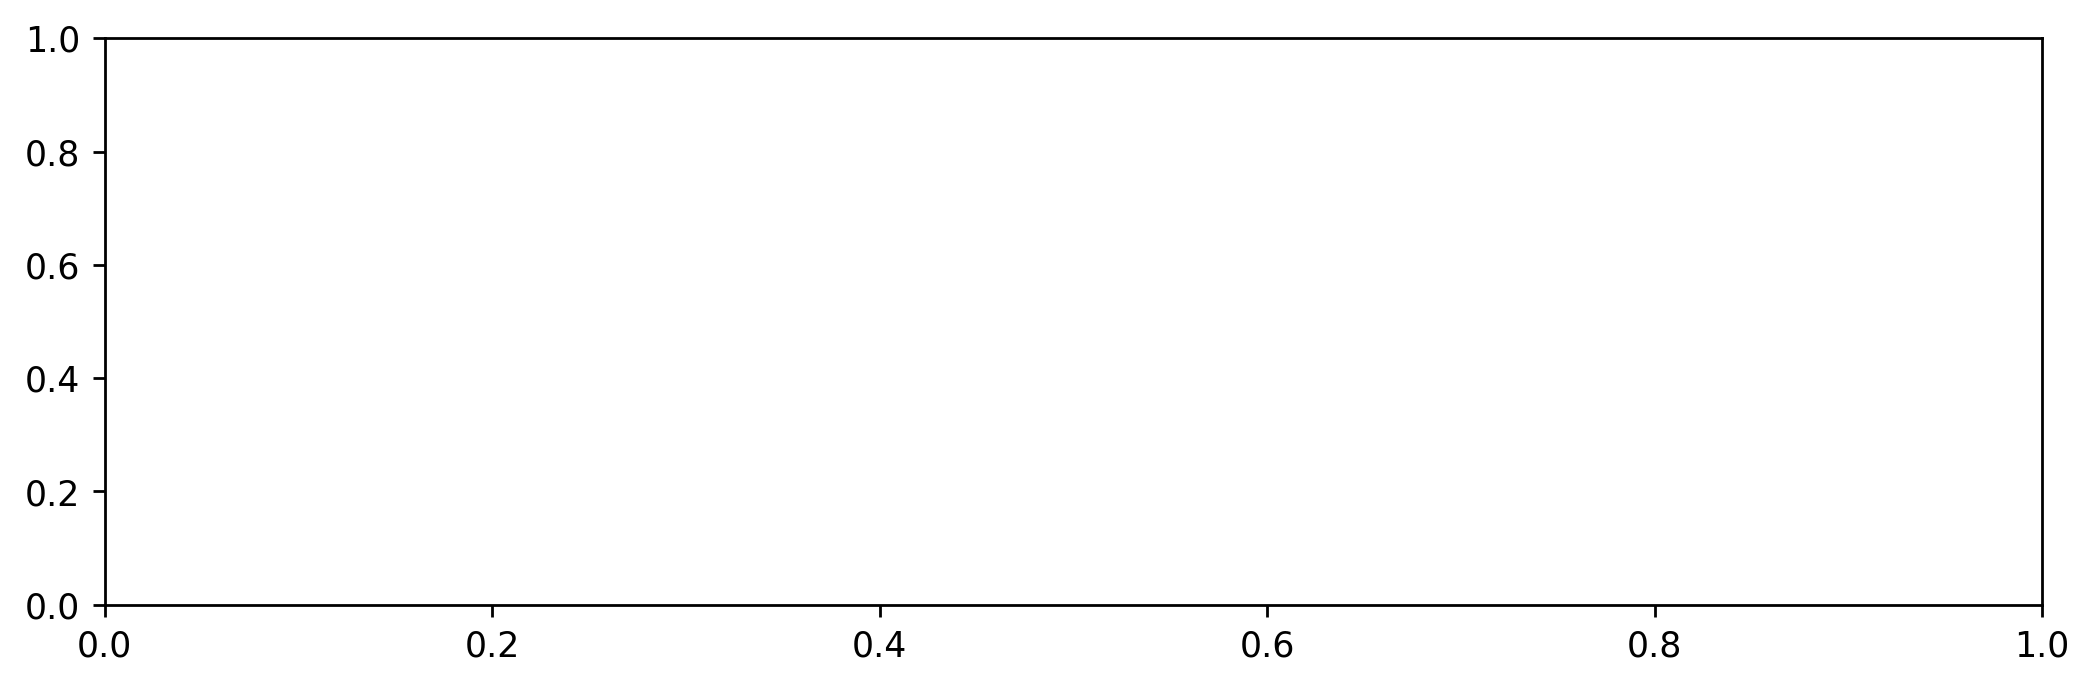

In [16]:
plt.xlim(0)


In [17]:
20001
50214572plt.xlim(0)


SyntaxError: invalid syntax (<ipython-input-17-ff3b1654ff52>, line 2)

In [18]:
0221378.04251

221378.04251

In [ ]:
0